In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Regularization and Reproducing Kernel Hilbert Spaces
In this section we cast splines into the larger context of regularization methods and reproducing kernel Hilbert spaces. This section is quite technical and can be skipped by the disinterested or intimidated reader. A general class of regularization problems has the form
$$\min_{f \in \mathcal{H}} \sum_{i=1}^N L(y_i, f(\mathbf{x}_i)) + \lambda J(f) \quad (5.42)$$where $L(y, f(\mathbf{x}))$ is a loss function, $J(f)$ is a penalty functional, and $\mathcal{H}$ is a space of functions on which $J(f)$ is defined. Girosi et al. (1995) describe quite general penalty functionals of the form$$J(f) = \int_{\mathbb{R}^d} \frac{|\tilde{f}(\mathbf{s})|^2}{\tilde{G}(\mathbf{s})} d\mathbf{s}, \quad (5.43)$$where $\tilde{f}$ denotes the Fourier transform of $f$, and $\tilde{G}$ is some positive function that falls off to zero as $||\mathbf{s}|| \to \infty$. The idea is that $1/\tilde{G}$ increases the penalty for high-frequency components of $f$. Under some additional assumptions they show that the solutions have the form$$f(\mathbf{X}) = \sum_{k=1}^K \alpha_k \varphi_k(\mathbf{X}) + \sum_{i=1}^N \theta_i G(\mathbf{X} - \mathbf{x}_i), \quad (5.44)$$
where the $\varphi_k$ span the null space of the penalty functional $J$, and $G$ is the inverse Fourier transform of $\tilde{G}$. Smoothing splines and thin-plate splines fall into this framework. The remarkable feature of this solution is that while the criterion (5.42) is defined over an infinite-dimensional space, the solution is finite-dimensional. In the next sections we look at some specific examples.

## Spaces of Functions Generated by Kernels
An important subclass of problems of the form (5.42) are generated by a **positive definite kernel** $K(\mathbf{x}, \mathbf{y})$, and the corresponding space of functions $\mathcal{H}_K$ is called a **reproducing kernel Hilbert space (RKHS)**. The penalty functional $J$ is defined in terms of the kernel as well. We give a brief and simplified introduction to this class of models, adapted from Wahba (1990) and Girosi et al. (1995), and nicely summarized in Evgeniou et al. (2000).

Let $\mathbf{x}, \mathbf{y} \in \mathbb{R}^p$. We consider the space of functions generated by the linear span of $\{K(\cdot, \mathbf{y}), \mathbf{y} \in \mathbb{R}^p)\}$; i.e arbitrary linear combinations of the form $f(\mathbf{x}) = \sum_m \alpha_m K(\mathbf{x}, \mathbf{y}_m)$, where each kernel term is viewed as a function of the first argument, and indexed by the second. Suppose that $K$ has an eigen-expansion
$$K(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^\infty \gamma_i \varphi_i(\mathbf{x})\varphi_i(\mathbf{y}) \quad (5.45)$$with $\gamma_i \geq 0$, $\sum_{i=1}^\infty \gamma_i^2 < \infty$. Elements of $\mathcal{H}_K$ have an expansion in terms of these eigen-functions,$$f(\mathbf{x}) = \sum_{i=1}^\infty c_i \varphi_i(\mathbf{x}), \quad (5.46)$$with the constraint that$$||f||_{\mathcal{H}_K}^2 \stackrel{\text{def}}{=} \sum_{i=1}^\infty c_i^2 / \gamma_i < \infty, \quad (5.47)$$where $||f||_{\mathcal{H}_K}$ is the norm induced by $K$. The penalty functional in (5.42) for the space $\mathcal{H}_K$ is defined to be the squared norm $J(f) = ||f||_{\mathcal{H}_K}^2$. The quantity $J(f)$ can be interpreted as a generalized ridge penalty, where functions with large eigenvalues in the expansion (5.45) get penalized less, and vice versa. Rewriting (5.42) we have$$\min_{f \in \mathcal{H}_K} \left\{ \sum_{i=1}^N L(y_i, f(\mathbf{x}_i)) + \lambda||f||_{\mathcal{H}_K}^2 \right\} \quad (5.48)$$or equivalently$$\min_{\{c_j\}^\infty_1} \left[ \sum_{i=1}^N L\left(y_i, \sum_{j=1}^\infty c_j \varphi_j(\mathbf{x}_i)\right) + \lambda \sum_{j=1}^\infty c_j^2 / \gamma_j \right] . \quad (5.49)$$It can be shown (Wahba, 1990, see also Exercise 5.15) that the solution to (5.48) is finite-dimensional, and has the form$$f(\mathbf{x}) = \sum_{i=1}^N \alpha_i K(\mathbf{x}, \mathbf{x}_i). \quad (5.50)$$The basis function $h_i(\mathbf{x}) = K(\mathbf{x}, \mathbf{x}_i)$ (as a function of the first argument) is known as the **representer of evaluation** at $\mathbf{x}_i$ in $\mathcal{H}_K$, since for $f \in \mathcal{H}_K$, it is easily seen that $\langle K(\cdot, \mathbf{x}_i), f \rangle_{\mathcal{H}_K} = f(\mathbf{x}_i)$. Similarly $\langle K(\cdot, \mathbf{x}_i), K(\cdot, \mathbf{x}_j) \rangle_{\mathcal{H}_K} = K(\mathbf{x}_i, \mathbf{x}_j)$ (the reproducing property of $\mathcal{H}_K$), and hence$$J(f) = \sum_{i=1}^N \sum_{j=1}^N K(\mathbf{x}_i, \mathbf{x}_j)\alpha_i \alpha_j \quad (5.51)$$for $f(\mathbf{x}) = \sum_{i=1}^N \alpha_i K(\mathbf{x}, \mathbf{x}_i)$. In light of (5.50) and (5.51), (5.48) reduces to a finite-dimensional criterion$$\min_{\boldsymbol{\alpha}} L(\mathbf{y}, \mathbf{K}\boldsymbol{\alpha}) + \lambda\boldsymbol{\alpha}^\top \mathbf{K}\boldsymbol{\alpha}. \quad (5.52)$$
We are using a vector notation, in which $\mathbf{K}$ is the $N \times N$ matrix with $ij$th entry $K(\mathbf{x}_i, \mathbf{x}_j)$ and so on. Simple numerical algorithms can be used to optimize (5.52). This phenomenon, whereby the infinite-dimensional problem (5.48) or (5.49) reduces to a finite dimensional optimization problem, has been dubbed the **kernel property** in the literature on support-vector machines (see Chapter 12).

There is a Bayesian interpretation of this class of models, in which $f$ is interpreted as a realization of a zero-mean stationary Gaussian process, with prior covariance function $K$. The eigen-decomposition produces a series of orthogonal eigen-functions $\varphi_j(\mathbf{x})$ with associated variances $\gamma_j$. The typical scenario is that “smooth” functions $\varphi_j$ have large prior variance, while “rough” $\varphi_j$ have small prior variances. The penalty in (5.48) is the contribution of the prior to the joint likelihood, and penalizes more those components with smaller prior variance (compare with (5.43)).

For simplicity we have dealt with the case here where all members of $\mathcal{H}$ are penalized, as in (5.48). More generally, there may be some components in $\mathcal{H}$ that we wish to leave alone, such as the linear functions for cubic smoothing splines in Section 5.4. The multidimensional thin-plate splines of Section 5.7 and tensor product splines fall into this category as well. In these cases there is a more convenient representation $\mathcal{H} = \mathcal{H}_0 \oplus \mathcal{H}_1$, with the null space $\mathcal{H}_0$ consisting of, for example, low degree polynomials in $\mathbf{x}$ that do not get penalized. The penalty becomes $J(f) = ||\mathbf{P}_1 f||$, where $\mathbf{P}_1$ is the orthogonal projection of $f$ onto $\mathcal{H}_1$. The solution has the form $f(\mathbf{x}) = \sum_{j=1}^P \beta_j h_j(\mathbf{x}) + \sum_{i=1}^N \alpha_i K(\mathbf{x}, \mathbf{x}_i)$, where the first term represents an expansion in $\mathcal{H}_0$. From a Bayesian perspective, the coefficients of components in $\mathcal{H}_0$ have improper priors, with infinite variance.

=== Kernel Ridge Regression (RKHS) Demo (Core Python) ===

Generating synthetic data...
Generated 20 data points.
X_train (first 5): ['0.00', '0.33', '0.66', '0.99', '1.32']
Y_train (first 5): ['0.47', '0.68', '0.71', '0.78', '0.50']

Fitting KRR model with lambda=0.1, gamma=1.0...
KRR model fitted successfully!
Alpha coefficients (first 5):
['0.0120', '0.2494', '-0.2481', '1.2340', '0.1888']

Making predictions on a fine grid for plotting...


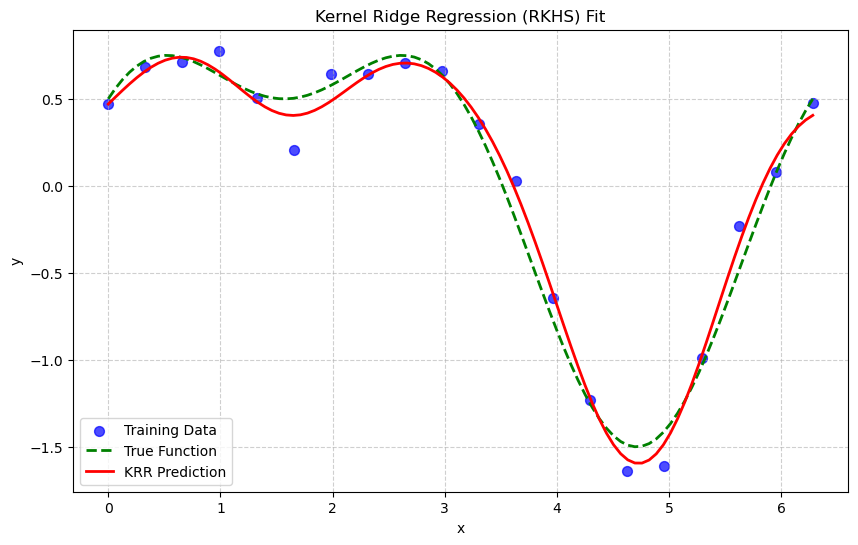

Plot generated successfully.


In [1]:
import math
import random

# --- Core Python Basic Math and Linear Algebra Helpers (Required) ---

def create_vector(size, value=0.0):
    """Creates a vector (list) of a given size initialized with a value."""
    return [value] * size

def create_matrix(rows, cols, value=0.0):
    """Creates a matrix (list of lists) of given dimensions initialized with a value."""
    return [[value for _ in range(cols)] for _ in range(rows)]

def matrix_transpose(matrix):
    """Transposes a matrix."""
    if not matrix or not matrix[0]: return []
    rows, cols = len(matrix), len(matrix[0])
    transposed = create_matrix(cols, rows)
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    return transposed

def matrix_multiply(matrix_a, matrix_b):
    """
    Multiplies two matrices (or a matrix and a vector).
    matrix_a: (R1, C1)
    matrix_b: (R2, C2)
    Result: (R1, C2) if C1 == R2
    Handles matrix @ matrix and matrix @ vector (vector treated as (R, 1) matrix).
    """
    if not matrix_a or not matrix_b: return []

    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    
    is_vector_b = not isinstance(matrix_b[0], list)
    if is_vector_b:
        rows_b, cols_b = len(matrix_b), 1
        matrix_b_as_matrix = [[x] for x in matrix_b]
    else:
        rows_b, cols_b = len(matrix_b), len(matrix_b[0])
        matrix_b_as_matrix = matrix_b

    if cols_a != rows_b:
        raise ValueError(f"Matrix dimensions incompatible for multiplication: ({rows_a},{cols_a}) @ ({rows_b},{cols_b})")

    result = create_matrix(rows_a, cols_b)
    for i in range(rows_a):
        for j in range(cols_b):
            sum_val = 0.0
            for k in range(cols_a):
                sum_val += matrix_a[i][k] * matrix_b_as_matrix[k][j]
            result[i][j] = sum_val
            
    if is_vector_b: 
        return [row[0] for row in result]
    return result

def vector_add(v1, v2):
    """Adds two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] + v2[i] for i in range(len(v1))]

def scalar_multiply_vector(scalar, v):
    """Multiplies a vector by a scalar."""
    return [scalar * x for x in v]

def scalar_matrix_multiply(scalar, matrix):
    """Multiplies a matrix by a scalar."""
    rows, cols = len(matrix), len(matrix[0])
    result = create_matrix(rows, cols)
    for i in range(rows):
        for j in range(cols):
            result[i][j] = scalar * matrix[i][j]
    return result

def matrix_add(matrix_a, matrix_b):
    """Adds two matrices."""
    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    rows_b, cols_b = len(matrix_b), len(matrix_b[0])
    if rows_a != rows_b or cols_a != cols_b:
        raise ValueError("Matrices must have the same dimensions for addition.")
    
    result = create_matrix(rows_a, cols_a)
    for i in range(rows_a):
        for j in range(cols_a):
            result[i][j] = matrix_a[i][j] + matrix_b[i][j]
    return result

def get_identity_matrix(size):
    """Returns an identity matrix of given size."""
    mat = create_matrix(size, size)
    for i in range(size):
        mat[i][i] = 1.0
    return mat

def inverse_matrix_gauss_jordan(matrix):
    """
    Computes the inverse of a square matrix using Gauss-Jordan elimination.
    This can be numerically unstable and slow for larger matrices in pure Python.
    """
    n = len(matrix)
    if any(len(row) != n for row in matrix):
        raise ValueError("Matrix must be square.")

    augmented_matrix = create_matrix(n, 2 * n)
    for i in range(n):
        for j in range(n):
            augmented_matrix[i][j] = matrix[i][j]
        augmented_matrix[i][i + n] = 1.0

    for i in range(n):
        max_row = i
        for k in range(i + 1, n):
            if abs(augmented_matrix[k][i]) > abs(augmented_matrix[max_row][i]):
                max_row = k
        augmented_matrix[i], augmented_matrix[max_row] = augmented_matrix[max_row], augmented_matrix[i]

        pivot = augmented_matrix[i][i]
        if abs(pivot) < 1e-9: # Check for near-zero pivot to detect singular matrix
            raise ValueError("Matrix is singular or nearly singular, cannot be inverted.")

        for j in range(2 * n):
            augmented_matrix[i][j] /= pivot

        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(2 * n):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]

    inverse = create_matrix(n, n)
    for i in range(n):
        for j in range(n):
            inverse[i][j] = augmented_matrix[i][j + n]
    return inverse

# --- Vector operations for kernel (reused from Thin-Plate Spline) ---
def vector_subtract(v1, v2):
    """Subtracts two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] - v2[i] for i in range(len(v1))]

def vector_dot_product(v1, v2):
    """Computes the dot product of two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return sum(v1[i] * v2[i] for i in range(len(v1)))

def squared_euclidean_norm(v):
    """Computes the squared Euclidean (L2) norm of a vector."""
    return vector_dot_product(v, v)

# --- Kernel Functions ---

def gaussian_rbf_kernel(x1, x2, gamma):
    """
    Computes the Gaussian (Radial Basis Function) kernel K(x1, x2).
    K(x1, x2) = exp(-gamma * ||x1 - x2||^2)
    x1, x2: Lists representing d-dimensional input vectors.
    gamma: Kernel parameter.
    """
    diff_vec = vector_subtract(x1, x2)
    squared_dist = squared_euclidean_norm(diff_vec)
    return math.exp(-gamma * squared_dist)

# --- Kernel Ridge Regression (KRR) Model ---

class KernelRidgeRegression:
    def __init__(self, lambda_val, gamma_val):
        self.lambda_val = lambda_val # Regularization parameter (lambda)
        self.gamma_val = gamma_val   # Kernel parameter (gamma for RBF)
        self.X_train = None          # Store training data points (x_i's)
        self.alpha_coeffs = None     # Coefficients alpha (solution of 5.52)

    def _compute_kernel_matrix(self, X1, X2=None):
        """
        Computes the kernel matrix K where K_ij = K(X1_i, X2_j).
        If X2 is None, computes K(X1_i, X1_j) for a square matrix.
        """
        if X2 is None:
            X2 = X1
        
        num_rows = len(X1)
        num_cols = len(X2)
        
        K_matrix = create_matrix(num_rows, num_cols)
        for i in range(num_rows):
            for j in range(num_cols):
                K_matrix[i][j] = gaussian_rbf_kernel(X1[i], X2[j], self.gamma_val)
        return K_matrix

    def fit(self, X_train, Y_train):
        """
        Fits the Kernel Ridge Regression model by solving for alpha.
        alpha = (K + lambda*I)^-1 @ y
        X_train: List of lists (N samples, d dimensions each)
        Y_train: List of targets (N samples)
        """
        if len(X_train) != len(Y_train):
            raise ValueError("Number of samples in X_train and Y_train must be equal.")
        if not X_train:
            raise ValueError("X_train cannot be empty.")

        self.X_train = X_train # Store training data for prediction phase
        N = len(X_train)

        # Compute the N x N kernel matrix K for training data
        K_matrix = self._compute_kernel_matrix(X_train)

        # Create lambda * I
        lambda_I = get_identity_matrix(N)
        lambda_I = scalar_matrix_multiply(self.lambda_val, lambda_I)

        # Compute (K + lambda * I)
        K_plus_lambda_I = matrix_add(K_matrix, lambda_I)

        # Compute (K + lambda * I)^-1
        try:
            inv_K_plus_lambda_I = inverse_matrix_gauss_jordan(K_plus_lambda_I)
        except ValueError as e:
            raise ValueError(f"Error inverting (K + lambda*I): {e}. Check lambda or data.")

        # Compute alpha = (K + lambda*I)^-1 @ y
        self.alpha_coeffs = matrix_multiply(inv_K_plus_lambda_I, Y_train)

    def predict(self, X_test):
        """
        Predicts outputs for new data points X_test.
        f(x_test) = sum_i(alpha_i * K(x_test, x_i_train))
        X_test: List of lists (M samples, d dimensions each)
        """
        if self.alpha_coeffs is None or self.X_train is None:
            raise ValueError("Model not fitted. Call .fit() first.")
        if not X_test:
            return []

        # Compute the M x N kernel matrix between test data and training data
        K_test_train = self._compute_kernel_matrix(X_test, self.X_train) # K(x_test, X_train)

        # Predictions are K_test_train @ alpha_coeffs
        predictions = matrix_multiply(K_test_train, self.alpha_coeffs)
        return predictions

# --- Demo Function ---

def demo_kernel_ridge_regression():
    print("=== Kernel Ridge Regression (RKHS) Demo (Core Python) ===")
    random.seed(42)

    # 1. Generate Synthetic 1D Data
    # For simplicity, let's use 1D data to make visualization easier later.
    # The KRR model itself handles multi-dimensional input.
    true_function = lambda x: math.sin(x) + 0.5 * math.cos(2 * x)
    true_noise_std = 0.2
    num_training_points = 20
    
    X_train_1d = [i * 2 * math.pi / (num_training_points - 1) for i in range(num_training_points)] # x from 0 to 2*pi
    Y_train = []
    
    X_train_md = [[x] for x in X_train_1d] # Convert to list of lists for multi-dim compatibility
    
    print("\nGenerating synthetic data...")
    for x_vec in X_train_md:
        y = true_function(x_vec[0]) + random.gauss(0, true_noise_std)
        Y_train.append(y)
    
    print(f"Generated {num_training_points} data points.")
    print("X_train (first 5):", [f"{x[0]:.2f}" for x in X_train_md[:5]])
    print("Y_train (first 5):", [f"{y:.2f}" for y in Y_train[:5]])

    # 2. Initialize and Fit Kernel Ridge Regression Model
    lambda_val = 0.1  # Regularization strength (hyperparameter)
    gamma_val = 1.0   # RBF kernel width (hyperparameter)

    krr_model = KernelRidgeRegression(lambda_val=lambda_val, gamma_val=gamma_val)
    print(f"\nFitting KRR model with lambda={lambda_val}, gamma={gamma_val}...")
    
    try:
        krr_model.fit(X_train_md, Y_train)
        print("KRR model fitted successfully!")
        print(f"Alpha coefficients (first 5):\n{[f'{c:.4f}' for c in krr_model.alpha_coeffs[:5]]}")
    except ValueError as e:
        print(f"Error during KRR fitting: {e}")
        return

    # 3. Make Predictions for Plotting
    num_plot_points = 100
    X_plot_1d = [i * 2 * math.pi / (num_plot_points - 1) for i in range(num_plot_points)]
    X_plot_md = [[x] for x in X_plot_1d]
    
    print("\nMaking predictions on a fine grid for plotting...")
    y_pred_krr = krr_model.predict(X_plot_md)
    y_true_plot = [true_function(x[0]) for x in X_plot_md]

    # 4. Plotting (using matplotlib)
    try:
        import matplotlib.pyplot as plt
        import numpy as np # For linspace and array operations in plotting setup

        plt.figure(figsize=(10, 6))
        plt.scatter(X_train_1d, Y_train, color='blue', label='Training Data', s=50, alpha=0.7)
        plt.plot(X_plot_1d, y_true_plot, color='green', linestyle='--', label='True Function', linewidth=2)
        plt.plot(X_plot_1d, y_pred_krr, color='red', label='KRR Prediction', linewidth=2)

        plt.title('Kernel Ridge Regression (RKHS) Fit')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
        print("Plot generated successfully.")

    except ImportError:
        print("\nMatplotlib not found. Cannot generate plot.")
        print("Please install it: pip install matplotlib")
    except Exception as e:
        print(f"\nAn error occurred during plotting: {e}")


# --- Main Execution ---
if __name__ == "__main__":
    demo_kernel_ridge_regression()



## Examples of RKHS
The machinery above is driven by the choice of the kernel $K$ and the loss function $L$. We consider first regression using squared-error loss. In this case (5.48) specializes to penalized least squares, and the solution can be characterized in two equivalent ways corresponding to (5.49) or (5.52):
$$\min_{\{c_j\}^\infty_1} \left( \sum_{i=1}^N \left(y_i - \sum_{j=1}^\infty c_j \varphi_j(\mathbf{x}_i)\right)^2 + \lambda \sum_{j=1}^\infty \frac{c_j^2}{\gamma_j} \right) \quad (5.53)$$an infinite-dimensional, generalized ridge regression problem, or
$$\min_{\boldsymbol{\alpha}} (\mathbf{y} - \mathbf{K}\boldsymbol{\alpha})^\top (\mathbf{y} - \mathbf{K}\boldsymbol{\alpha}) + \lambda\boldsymbol{\alpha}^\top \mathbf{K}\boldsymbol{\alpha}. \quad (5.54)$$The solution for $\boldsymbol{\alpha}$ is obtained simply as
$$\hat{\boldsymbol{\alpha}} = (\mathbf{K} + \lambda\mathbf{I})^{-1}\mathbf{y}, \quad (5.55)$$and
$$\hat{f}(\mathbf{x}) = \sum_{j=1}^N \hat{\alpha}_j K(\mathbf{x}, \mathbf{x}_j). \quad (5.56)$$

=== Kernel Ridge Regression (RKHS) Demo (Core Python, No NumPy) ===

Generating synthetic data...
Generated 30 data points.

Fitting KRR model with lambda=0.01, gamma=0.5...
KRR model fitted successfully!
Alpha coefficients (first 5):
['-2.2816', '-2.6489', '-1.5811', '16.0087', '2.1883']

Making predictions on a fine grid for plotting...


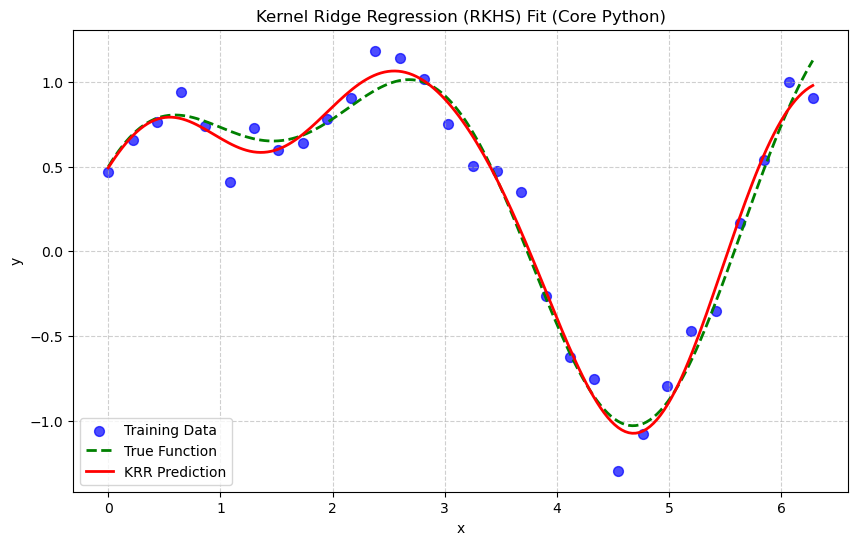

Plot generated successfully.


In [1]:
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
import matplotlib.patches as mpatches # For custom legend handles

# --- Core Python Basic Math and Linear Algebra Helpers ---

def create_vector(size, value=0.0):
    """Creates a vector (list) of a given size initialized with a value."""
    return [value] * size

def create_matrix(rows, cols, value=0.0):
    """Creates a matrix (list of lists) of given dimensions initialized with a value."""
    return [[value for _ in range(cols)] for _ in range(rows)]

def matrix_transpose(matrix):
    """Transposes a matrix."""
    if not matrix or not matrix[0]: return []
    rows, cols = len(matrix), len(matrix[0])
    transposed = create_matrix(cols, rows)
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    return transposed

def matrix_multiply(matrix_a, matrix_b):
    """
    Multiplies two matrices (or a matrix and a vector).
    matrix_a: (R1, C1)
    matrix_b: (R2, C2)
    Result: (R1, C2) if C1 == R2
    Handles matrix @ matrix and matrix @ vector (vector treated as (R, 1) matrix).
    """
    if not matrix_a or not matrix_b: return []

    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    
    is_vector_b = not isinstance(matrix_b[0], list)
    if is_vector_b:
        rows_b, cols_b = len(matrix_b), 1
        matrix_b_as_matrix = [[x] for x in matrix_b]
    else:
        rows_b, cols_b = len(matrix_b), len(matrix_b[0])
        matrix_b_as_matrix = matrix_b

    if cols_a != rows_b:
        raise ValueError(f"Matrix dimensions incompatible for multiplication: ({rows_a},{cols_a}) @ ({rows_b},{cols_b})")

    result = create_matrix(rows_a, cols_b)
    for i in range(rows_a):
        for j in range(cols_b):
            sum_val = 0.0
            for k in range(cols_a):
                sum_val += matrix_a[i][k] * matrix_b_as_matrix[k][j]
            result[i][j] = sum_val
            
    if is_vector_b: 
        return [row[0] for row in result]
    return result

def vector_add(v1, v2):
    """Adds two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] + v2[i] for i in range(len(v1))]

def scalar_multiply_vector(scalar, v):
    """Multiplies a vector by a scalar."""
    return [scalar * x for x in v]

def scalar_matrix_multiply(scalar, matrix):
    """Multiplies a matrix by a scalar."""
    rows, cols = len(matrix), len(matrix[0])
    result = create_matrix(rows, cols)
    for i in range(rows):
        for j in range(cols):
            result[i][j] = scalar * matrix[i][j]
    return result

def matrix_add(matrix_a, matrix_b):
    """Adds two matrices."""
    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    rows_b, cols_b = len(matrix_b), len(matrix_b[0])
    if rows_a != rows_b or cols_a != cols_b:
        raise ValueError("Matrices must have the same dimensions for addition.")
    
    result = create_matrix(rows_a, cols_a)
    for i in range(rows_a):
        for j in range(cols_a):
            result[i][j] = matrix_a[i][j] + matrix_b[i][j]
    return result

def get_identity_matrix(size):
    """Returns an identity matrix of given size."""
    mat = create_matrix(size, size)
    for i in range(size):
        mat[i][i] = 1.0
    return mat

def inverse_matrix_gauss_jordan(matrix):
    """
    Computes the inverse of a square matrix using Gauss-Jordan elimination.
    This can be numerically unstable and slow for larger matrices in pure Python.
    """
    n = len(matrix)
    if any(len(row) != n for row in matrix):
        raise ValueError("Matrix must be square.")

    augmented_matrix = create_matrix(n, 2 * n)
    for i in range(n):
        for j in range(n):
            augmented_matrix[i][j] = matrix[i][j]
        augmented_matrix[i][i + n] = 1.0

    for i in range(n):
        max_row = i
        for k in range(i + 1, n):
            if abs(augmented_matrix[k][i]) > abs(augmented_matrix[max_row][i]):
                max_row = k
        augmented_matrix[i], augmented_matrix[max_row] = augmented_matrix[max_row], augmented_matrix[i]

        pivot = augmented_matrix[i][i]
        if abs(pivot) < 1e-9: # Check for near-zero pivot to detect singular matrix
            raise ValueError("Matrix is singular or nearly singular, cannot be inverted.")

        for j in range(2 * n):
            augmented_matrix[i][j] /= pivot

        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(2 * n):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]

    inverse = create_matrix(n, n)
    for i in range(n):
        for j in range(n):
            inverse[i][j] = augmented_matrix[i][j + n]
    return inverse

# --- Vector operations for kernel ---
def vector_subtract(v1, v2):
    """Subtracts two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] - v2[i] for i in range(len(v1))]

def vector_dot_product(v1, v2):
    """Computes the dot product of two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return sum(v1[i] * v2[i] for i in range(len(v1)))

def squared_euclidean_norm(v):
    """Computes the squared Euclidean (L2) norm of a vector."""
    return vector_dot_product(v, v)

# --- Kernel Functions ---

def gaussian_rbf_kernel(x1, x2, gamma):
    """
    Computes the Gaussian (Radial Basis Function) kernel K(x1, x2).
    K(x1, x2) = exp(-gamma * ||x1 - x2||^2)
    x1, x2: Lists representing d-dimensional input vectors.
    gamma: Kernel parameter.
    """
    diff_vec = vector_subtract(x1, x2)
    squared_dist = squared_euclidean_norm(diff_vec)
    return math.exp(-gamma * squared_dist)

# --- Kernel Ridge Regression (KRR) Model ---

class KernelRidgeRegression:
    def __init__(self, lambda_val, gamma_val):
        self.lambda_val = lambda_val # Regularization parameter (lambda)
        self.gamma_val = gamma_val   # Kernel parameter (gamma for RBF)
        self.X_train = None          # Stores training data points (x_i's)
        self.alpha_coeffs = None     # Coefficients alpha (solution of 5.55)

    def _compute_kernel_matrix(self, X1, X2=None):
        """
        Computes the kernel matrix K where K_ij = K(X1_i, X2_j).
        If X2 is None, computes K(X1_i, X1_j) for a square matrix.
        """
        if X2 is None:
            X2 = X1
        
        num_rows = len(X1)
        num_cols = len(X2)
        
        K_matrix = create_matrix(num_rows, num_cols)
        for i in range(num_rows):
            for j in range(num_cols):
                K_matrix[i][j] = gaussian_rbf_kernel(X1[i], X2[j], self.gamma_val)
        return K_matrix

    def fit(self, X_train, Y_train):
        """
        Fits the Kernel Ridge Regression model by solving for alpha.
        alpha = (K + lambda*I)^-1 @ y  (Equation 5.55)
        X_train: List of lists (N samples, d dimensions each)
        Y_train: List of targets (N samples)
        """
        if len(X_train) != len(Y_train):
            raise ValueError("Number of samples in X_train and Y_train must be equal.")
        if not X_train:
            raise ValueError("X_train cannot be empty.")

        self.X_train = X_train # Store training data for prediction phase
        N = len(X_train)

        # Compute the N x N kernel matrix K for training data
        K_matrix = self._compute_kernel_matrix(X_train)

        # Create lambda * I (lambda_val times identity matrix)
        lambda_I = get_identity_matrix(N)
        lambda_I = scalar_matrix_multiply(self.lambda_val, lambda_I)

        # Compute (K + lambda * I)
        K_plus_lambda_I = matrix_add(K_matrix, lambda_I)

        # Compute (K + lambda * I)^-1
        try:
            inv_K_plus_lambda_I = inverse_matrix_gauss_jordan(K_plus_lambda_I)
        except ValueError as e:
            raise ValueError(f"Error inverting (K + lambda*I): {e}. Check lambda or data.")

        # Compute alpha = (K + lambda*I)^-1 @ y
        self.alpha_coeffs = matrix_multiply(inv_K_plus_lambda_I, Y_train)

    def predict(self, X_test):
        """
        Predicts outputs for new data points X_test.
        f_hat(x) = sum_j(alpha_hat_j * K(x, x_j))  (Equation 5.56)
        X_test: List of lists (M samples, d dimensions each)
        """
        if self.alpha_coeffs is None or self.X_train is None:
            raise ValueError("Model not fitted. Call .fit() first.")
        if not X_test:
            return []

        # Compute the M x N kernel matrix between test data and training data
        K_test_train = self._compute_kernel_matrix(X_test, self.X_train) # K(x_test, X_train)

        # Predictions are K_test_train @ alpha_coeffs
        predictions = matrix_multiply(K_test_train, self.alpha_coeffs)
        return predictions

# --- Demo Function (Modified to remove NumPy for plotting) ---

def demo_kernel_ridge_regression():
    print("=== Kernel Ridge Regression (RKHS) Demo (Core Python, No NumPy) ===")
    random.seed(42)

    # 1. Generate Synthetic 1D Data
    true_function = lambda x: math.sin(x) + 0.5 * math.cos(2 * x) + 0.1 * x
    true_noise_std = 0.2
    num_training_points = 30 # Increased points slightly
    
    # Generate X_train_1d using pure Python loop
    X_train_1d = []
    for i in range(num_training_points):
        X_train_1d.append(i * 2 * math.pi / (num_training_points - 1))
        
    X_train_md = [[x] for x in X_train_1d] # Convert to list of lists for multi-dim compatibility
    
    Y_train = []
    print("\nGenerating synthetic data...")
    for x_vec in X_train_md:
        y = true_function(x_vec[0]) + random.gauss(0, true_noise_std)
        Y_train.append(y)
    
    print(f"Generated {num_training_points} data points.")

    # 2. Initialize and Fit Kernel Ridge Regression Model
    lambda_val = 0.01  # Regularization strength (hyperparameter)
    gamma_val = 0.5   # RBF kernel width (hyperparameter)

    krr_model = KernelRidgeRegression(lambda_val=lambda_val, gamma_val=gamma_val)
    print(f"\nFitting KRR model with lambda={lambda_val}, gamma={gamma_val}...")
    
    try:
        krr_model.fit(X_train_md, Y_train)
        print("KRR model fitted successfully!")
        print(f"Alpha coefficients (first 5):\n{[f'{c:.4f}' for c in krr_model.alpha_coeffs[:5]]}")
    except ValueError as e:
        print(f"Error during KRR fitting: {e}")
        return

    # 3. Make Predictions for Plotting (No NumPy for X_plot_1d)
    num_plot_points = 200
    X_plot_1d = []
    for i in range(num_plot_points):
        X_plot_1d.append(i * 2 * math.pi / (num_plot_points - 1))
        
    X_plot_md = [[x] for x in X_plot_1d]
    
    print("\nMaking predictions on a fine grid for plotting...")
    y_pred_krr = krr_model.predict(X_plot_md)
    y_true_plot = [true_function(x[0]) for x in X_plot_md]

    # 4. Plotting (using matplotlib, no numpy data preparation)
    try:
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train_1d, Y_train, color='blue', label='Training Data', s=50, alpha=0.7)
        plt.plot(X_plot_1d, y_true_plot, color='green', linestyle='--', label='True Function', linewidth=2)
        plt.plot(X_plot_1d, y_pred_krr, color='red', label='KRR Prediction', linewidth=2)

        plt.title('Kernel Ridge Regression (RKHS) Fit (Core Python)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
        print("Plot generated successfully.")

    except ImportError:
        print("\nMatplotlib not found. Cannot generate plot.")
        print("Please install it: pip install matplotlib")
    except Exception as e:
        print(f"\nAn error occurred during plotting: {e}")


# --- Main Execution ---
if __name__ == "__main__":
    demo_kernel_ridge_regression()